# **ANÁLISE DE DADOS DE PREVISÃO DE INSUFICIÊNCIA CARDÍACA**

# 1.Justificativa


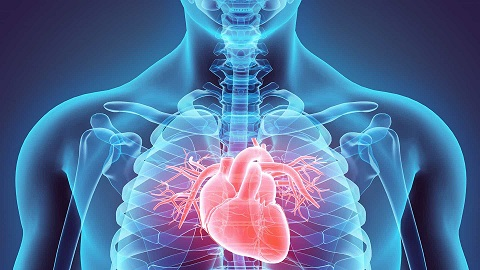

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro em cada 5 mortes por DCV são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorrem prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum que causa DCVs e este conjunto de dados contém 11 'features' que podem ser usados ​​para prever uma possível doença cardíaca.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia) precisam de detecção e gerenciamento precoces, assim, a análise de dados e até mesmo um modelo de 'machine learning' pode ser de grande ajuda

# 2.Fonte do Conjunto de Dados

Este Dataset foi retirado do repositório de dados do site kaggle e pode ser acessado pelo seguinte link: https://www.kaggle.com/fedesoriano/heart-failure-prediction.

O conjunto de dados foi criado combinando diferentes conjuntos de dados já disponíveis de forma independente, mas não combinados antes. Neste conjunto de dados, 5 conjuntos de dados cardíacos são combinados em 11 características comuns, o que o torna **o maior conjunto de dados de doenças cardíacas disponível até agora para fins de pesquisa**. Os cinco conjuntos de dados usados ​​para sua curadoria são:

*  Cleveland: 303 observações
*  Hungarian: 294 observações
*  Switzerland: 123 observações
*  Long Beach VA: 200 observações
*  Stalog (Heart) Data Set: 270 observações

Total: 1190 observações

Duplicadas: 272 observações

**Dataset final: 918 observações**

Cada conjunto de dados usado pode ser encontrado no Índice de conjuntos de dados de doenças cardíacas do UCI Machine Learning Repository no seguinte link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

O que aconteceu aqui foi uma **INTEGRAÇÃO DE DADOS**, ou seja, dados reunidos que estavam distribuídos em diferentes conjuntos de dados onde é realizada uma busca por atributos comuns nos conjuntos de dados. Isso faz parte de um pré-processamento de dados.



# 3.Carregando Dataset

O arquivo é do tipo .csv e tabulado (dados que formam uma grande tabela, como em uma planilha). É carregado/importado como um DataFrame Pandas.

In [73]:
import pandas as pd
data = pd.read_csv('heart.csv')

# 4.Descrição das *Features*

Em geral, vetores descrevem os dados, também denominados atributos ou *features*. Cada objeto corresponde a uma ocorrência dos dados. Cada atributo está associado a uma propriedade do objeto.

Formalmente, os dados podem ser representados por uma matriz de objetos X<sub>nxd</sub>, em que n é o número de objetos e d é o número de atributos de entrada de cada objeto. O valor de d define a dimensionalidade dos objetos ou do espaço de objetos. Cada elemento dessa matriz,X<sub>i</sub><sup>j</sup>, contém o valor da j-ésima caracterítica para o i-ésimo objeto. Os d atributos também podem ser vistos como um conjunto de eixos ortogonais  e os objetos, como pontos no espaço de dimensão d, chamado espaço de objetos.

As classes a que pertencem os objetos é chamado de atributo alvo. No nosso caso, que é um típico problema de classificação esse atributo é denominado de classe e assume valores discretos. Para o caso de valores contínuos seria um problema de regressão.

In [74]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Age: age of the patient [years] 
*  Sex: sex of the patient [M: Male, F: Female] 
*  ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] - 
*  RestingBP: resting blood pressure [mm Hg]
*  Cholesterol: serum cholesterol [mm/dl]
*  FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
*  RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
*  HeartDisease: output class [1: heart disease, 0: Normal] *texto em itálico*

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 5.Caracterização dos Dados: Tipo e Escala


Os valores que um atributo pode assumir podem ser definidos de diferentes formas. Aqui defini 2 aspectos: tipo e escala. **O tipo de um atributo diz respeito ao grau de quantização nos dados, e a escala a significância relativa dos valores.** Conhecer o tipo/escala dos atributos auxilia a identificar a forma adequada de preparar os dados e posteriormente de modelá-los.

O tipo define se o atributo representa quantidade,  sendo então denominado quantitativo ou númerico e, ou qualidade,  quando é chamado de qualitativo, simbólico ou categórico, pois os valores podem ser associados a categorias.

A escala define operações que podem ser realizadas sobre os valores do atributo. Em relação à escala, os atributos podem ser classificados como nominais, ordinais, intervalares e racionais. Os dois primeiros são do tipo qualitativo e os dois últimos são quantitativos.


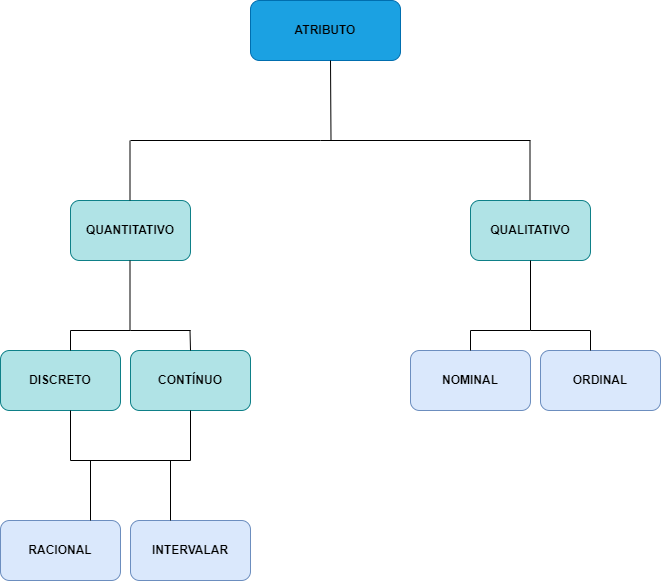

* Age: Quantitativo / Discreto / Racional
*  Sex: Qualitativo / Nominal
*  ChestPainType: Qualitativo / Nominal
*  RestingBP: Qualitativo / Nominal
*  Cholesterol: Quantitativo / Contínuo / Intervalar
*  FastingBS: Qualitativo / Nominal
*  RestingECG: Qualitativo / Nominal
* MaxHR: Quantitativo / Discreto / Intervalar
* ExerciseAngina: Qualitativo / Nominal
* Oldpeak: Quantitativo / Contínuo / Racional
* ST_Slope: Qualitativo / Nominal
*  HeartDisease: Qualitativo / Nominal (atributo alvo)

# 6.Pré-Processamento de Dados

Os valores dos atributos de um conjunto de dados podem conter ruídos e imperfeições, com valores corretos, inconsistentes, duplicados ou ausentes; os atributos podem ser independentes ou relacionados; os conjuntos de dados podem apresentar poucos ou muitos objetos, que por sua vez, podem ter um número elevado ou pequeno de atributos. Tudo isso impacta diretamente na análise desses dados, afeta o desempenho de algoritmos de *machine learning*, leva a contruçao de modelos mais fiéis a distribuição dos dados, reduz complexidade computacional, adequa os dados para determinados algoritmos e facilita a interpretação. 

A preparação de dados específicos necessária para um conjunto de dados
depende das especificidades dos dados, como os tipos de variáveis, bem como os algoritmos que será usado para modelá-los. No entanto, existe uma coleção de algoritmos de preparação de dados padrão que podem ser aplicado a dados estruturados:

1. **Limpeza de dados (*data cleaning*): Identificar e corrigir erros ou erros nos dados.** 
2. Seleção de recursos (*feature selection*): Identificar as variáveis ​​de entrada que são mais relevantes para a tarefa.
3. Transformações de dados (*data transforms*): Alterar a escala ou distribuição das variáveis.
4. Engenharia de recursos (*feature engineering*): derivando novas variáveis ​​de dados disponíveis.
5. Redução da dimensionalidade (*dimensionality reduction*): criação de projeções compactas dos dados.



## 6.1 *Data Cleaning*

### 6.1.1 Limpeza de Dados Básica


Antes de passar para os métodos sofisticados, existem algumas operações de limpeza de dados muito básicas que você provavelmente deve executar em todos os projetos.

1. Identificar e remover colunas que contenham um único valor
2. Considere as colunas que têm poucos valores
3. Identificar e excluir as linhas que contêm dados duplicados

#### 6.1.1.1 Identificar e Remover Colunas que Contenham um Único Valor

Aqui, um único valor significa que cada linha dessa coluna tem o mesmo valor.

In [76]:
#identificar e remover colunas que contenham um unico valor

#resumir o numero de valores unicos em cada coluna
print(data.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


Obtemos o índice da coluna e o número de valores exclusivos para cada coluna - um baixo número faz sentido para variáveis categóticas ou númericas com intervalo pequeno.

#### 6.1.1.2 Considere Colunas Que Têm Poucos Valores

O código abaixo relata o índice da coluna e o número de valores exclusivos para cada coluna, seguido pela porcentagem de valores exclusivos de todas as linhas no conjunto de dados. Aqui podemos ver que nenhuma coluna de valores númericos têm uma porcentagem muito baixa de valores exclusivos, como abaixo de 1 por cento.

Ainda assim, o atributo 9 tem apenas 5.8%. Não necessariamente é um caso a remover, mas podemos nos perguntar se talvez possam ser codificados como valores categóricos.



In [77]:
from numpy import unique

#resumir o número de valores únicos em cada coluna
for i in range(data.shape[1]):
    num = len(unique(data.iloc[:, i]))
    percentage = float(num) / data.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 50, 5.4%
1, 2, 0.2%
2, 4, 0.4%
3, 67, 7.3%
4, 222, 24.2%
5, 2, 0.2%
6, 3, 0.3%
7, 119, 13.0%
8, 2, 0.2%
9, 53, 5.8%
10, 3, 0.3%
11, 2, 0.2%


#### 6.1.1.3 Identificar e Excluir as linhas que Contêm Dados Duplicados

Uma linha duplicada é uma linha onde cada valor em cada coluna para essa linha aparece de forma id^entica na mesma ordem (mesmos valores de coluna) em outra linha. Linhas com dados idêticos podem ser inuteis para o processo de modelagem, se não perigosamente enganosa durante a avaliação do modelo. No dataset não foram encontradas linhas com valores duplicados, conforme mostra o trecho de código com sua respectiva saída. Isso já havia sido informado na descrição do dataset, mas nunca é demais conferirmos.

In [78]:
#excluir linhas de dados duplicados do conjunto de dados

print(data.shape)
#deletar linhas duplicadas
data.drop_duplicates(inplace=True)
print(data.shape)

(918, 12)
(918, 12)


### 6.1.2 Marcar e Remover Dados Ausentes

Os dados do mundo real geralmente têm valores ausentes. Os dados podem ter valores ausentes por vários motivos como observações que não foram registradas e dados comrrompidos.

O método .dropna() é direto, e remove os valores NaN encontrados no DataFrame.Por padrão, se você não informar o eixo, serão eliminadas todas as linhas relativas à celula contendo o valor ausente (df.dropna(axis=0)). Caso você deseje eliminar uma coluna inteira onde existam NaN, você deve informar explicitamente com df.dropna(axis=1).

In [79]:
data.dropna(axis=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Não foram encontrados valores ausentes no conjunto de dados. Caso houvesse, poderia ser feita uma remoção da linha ou coluna ou uma imputação dentro do mesmo domínio dos valores do atributo.

### 6.1.3 Identificação de *Outliers*

*Outliers* são valores extremos que estão fora do intervalo do que é esperado e ao
contrário dos outros dados. Modelos de *machine learning* podem ser melhorados removendo esses valores atípicos. É indicado que um especialista de domínio
interprete as observações e decidida se um valor é um outlier ou não dependendo das características do conjunto de dados.

Podemos usar métodos estatísticos para identificar observações que parecem ser raras ou improváveis, mesmo assim é uma das mais difíceis etapas da limpeza de dados e leva tempo para acertar. Mesmo com uma profunda compreensão das estatísticas e como os *outliers* podem afetar seus dados, é sempre um tópico para explorar com cautela. Certos valores que seriam *outliers* podem ser decisivos a um problema de classificação, como no caso de indentificação de anomalias.

Mesmo sem um especialista pode-se remover valores muito estrahos, por exemplo, para esse conjunto de dados, caso encontrassemos alguém com batimentos cardíacos em 0. Fora isso, apenas indico quais possíveis valores de *outliers* utilizando estatística e ficaria a critério de um especialista avaliar se realmente faria sentido retirar tais valores.



Se sabemos que a distribuição de valores na amostra é gaussiana ou semelhante a gaussiana, podemos use o desvio padrão da amostra para identificar *outliers*. Um histograma dos atributos númericos pode ser útil para observamos a distribuição dos dados. Essa etapa já poderia ser considerada uma forma de visualização de dados.

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

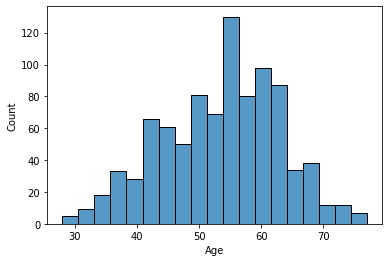

In [81]:
sns.histplot(data['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


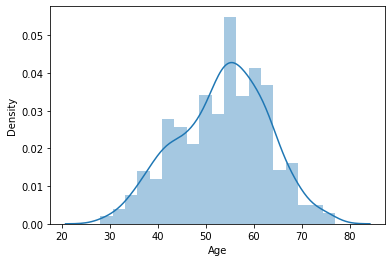

In [82]:
sns.distplot(data['Age'])
plt.show()

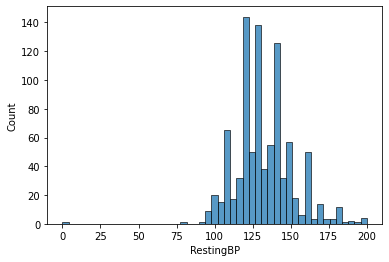

In [83]:
sns.histplot(data['RestingBP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


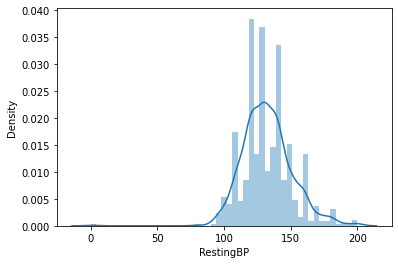

In [84]:
sns.distplot(data['RestingBP'])

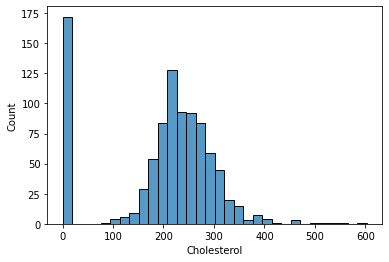

In [85]:
sns.histplot(data['Cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


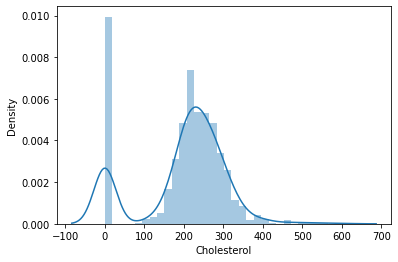

In [86]:
sns.distplot(data['Cholesterol'])

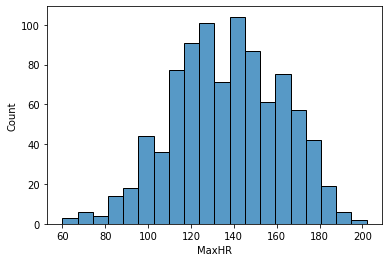

In [87]:
sns.histplot(data['MaxHR'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


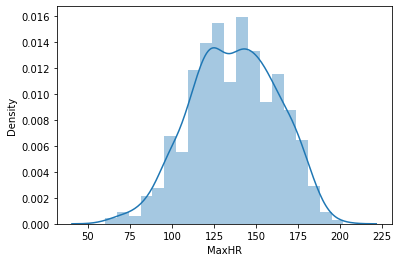

In [88]:
sns.distplot(data['MaxHR'])

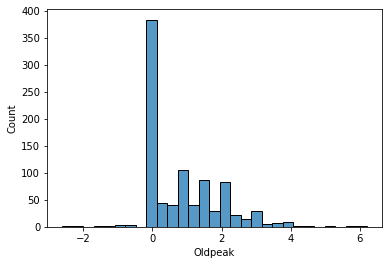

In [89]:
sns.histplot(data['Oldpeak'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


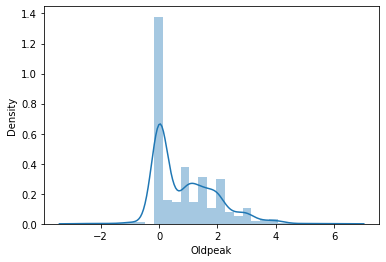

In [90]:
sns.distplot(data['Oldpeak'])

Nem todos os dados são normais ou normais o suficiente para tratá-los como retirados de uma distribuição gaussiana. Uma boa estatística para resumir uma amostra de distribuição não gaussiana de dados é a amplitude interquartil, ou IQR. A partir dele podemos construir gráficos de box plot úteis para identificação de outliers.



O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (*outliers*) do conjunto de dados.

* Posição – Em relação à posição dos dados, observa-se a linha central do retângulo (a mediana ou segundo quartil).

* Dispersão – A dispersão dos dados pode ser representada pelo intervalo interquartílico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interquartílico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de *outliers*.

* Simetria – Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.

* Caudas – As linhas que vão do retângulo até aos *outliers* podem fornecer o comprimento das caudas da distribuição.

* *Outliers* – Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de *outliers*.

O limite de detecção de *outliers* é construído utilizando o intervalo interquartílico, dado pela distância entre o primeiro e o terceiro quartil. Sendo assim, os limites inferior e superior de detecção de *outlier* são dados por:

Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)

Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


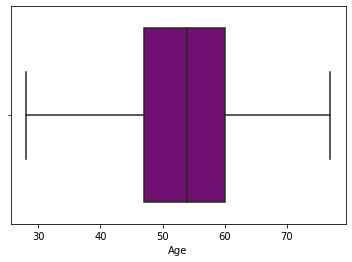

In [91]:
azero = sns.boxplot(data['Age'],color='purple')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


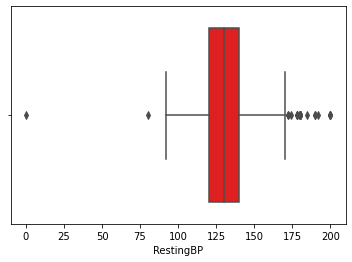

In [92]:
athree = sns.boxplot(data['RestingBP'],color='red')

In [93]:
data_RestingBP = pd.DataFrame(data, columns=['RestingBP'])
data_RestingBP.info()
data_RestingBP.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   RestingBP  918 non-null    int64
dtypes: int64(1)
memory usage: 14.3 KB


,RestingBP
0,140
1,160
2,130
3,138
4,150


In [94]:
#Removendo os outliers e plotando novamente o box plot

#primeiro quartil
Q1 = data_RestingBP.quantile(0.25)
#segundo quartil
Q2 = data_RestingBP.quantile(0.50)
#terceiro quartil
Q3 = data_RestingBP.quantile(0.75)
#amplitude interquartil
IQR = Q3 - Q1
#limite inferior
LI = Q1 - ( 1.5 * IQR)
#limite superior
LS = Q3 + ( 1.5 * IQR)

#tratando os outliers
data_no_outlier = pd.DataFrame(
    data_RestingBP[(
        (data_RestingBP >= Q1 - (1.5 * IQR)) 
        & (data_RestingBP<= Q3 + (1.5 * IQR))
    )]
 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


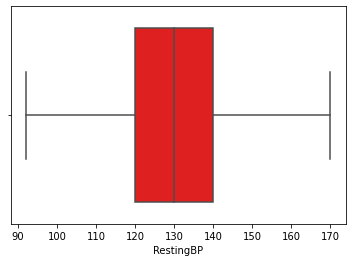

In [95]:
athree_no_outlier = sns.boxplot(data_no_outlier['RestingBP'],color='red')

In [96]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RestingBP  890 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


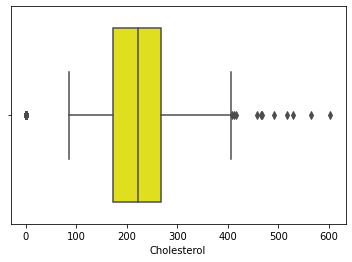

In [97]:
afour = sns.boxplot(data['Cholesterol'],color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


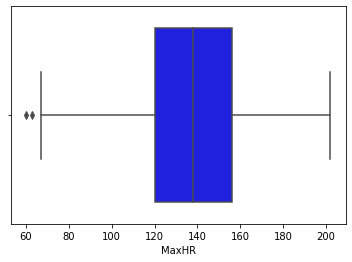

In [98]:
aseven = sns.boxplot(data['MaxHR'],color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


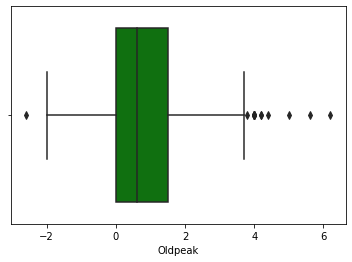

In [99]:
anine = sns.boxplot(data['Oldpeak'],color='green')

# 7.*Exploratory Data Analysis*: Quem Tem Mais Risco de Insuficiência Cardíaca?

A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas que ajudem a compreender o processo que gerou os dados. Muitas dessas características podem ser obtidas por meio da aplicação de fórmulas estatísticas simples. Outras podem ser observadas por meio de técnicas de visualização.


## 7.1Relações Entre os Atributos Categóricos

### 7.1.1 Dois Atributos

A relação entre variáveis categóricas podem ser bem compreendidas através do uso de tabelas de contingência - algo simples e útil. Aqui explorei a relação entre tais atributos e o atributo alvo. Apesar de algo simples, consegui tirar interessantes conclusões acerca dos dados.

In [100]:
tabela1 = pd.crosstab(data.Sex, data.HeartDisease)
tabela1

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


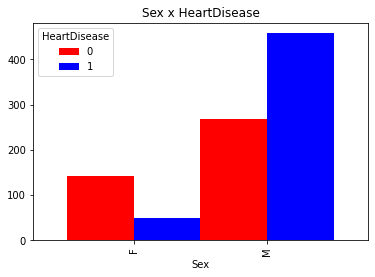

In [101]:
tabela1.plot(kind='bar',width=1.0, color=['red','blue',], title='Sex x HeartDisease' ,grid=False)
plt.show()

# individuos do sexo masculino tem mais insuficiência cardiaca

In [102]:
tabela2 = pd.crosstab(data.Age, data.HeartDisease)
tabela2

HeartDisease,0,1
Age,,
28,1,0
29,3,0
30,1,0
31,1,1
32,3,2
33,1,1
34,5,2
35,7,4
36,4,2


In [103]:
tabela2.max()

HeartDisease
0    28
1    28
dtype: int64

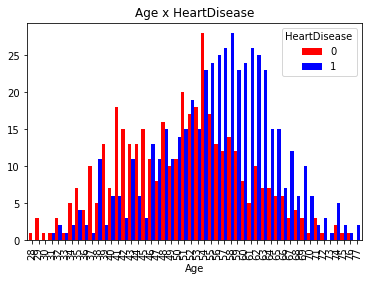

In [104]:
tabela2.plot(kind='bar',width=1.0, color=['red','blue'], title='Age x HeartDisease' ,grid=False)
plt.show()

#individuos de 58 anos apresentaram mais casos de doenças cardíacas e na faixa de 50 a 70 anos

In [105]:
tabela3 = pd.crosstab(data.ChestPainType, data.HeartDisease)
tabela3

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


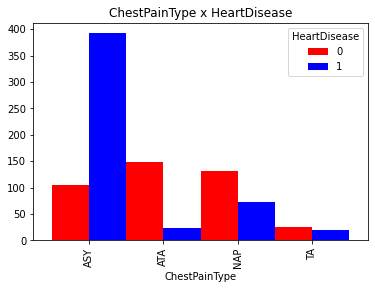

In [106]:
tabela3.plot(kind='bar',width=1.0, color=['red','blue'], title='ChestPainType x HeartDisease' ,grid=False)
plt.show()

#individuos assintomatico em relacao a dor no peito tem mais insuficiencia cardiaca

In [107]:
tabela4 = pd.crosstab(data.FastingBS, data.HeartDisease)
tabela4

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


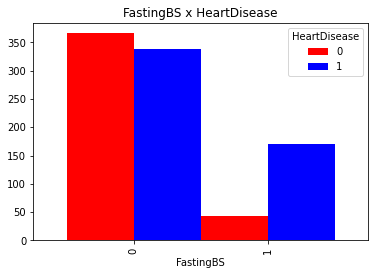

In [108]:
tabela4.plot(kind='bar',width=1.0, color=['red','blue'], title='FastingBS x HeartDisease' ,grid=False)
plt.show()

#individuos nao pre-diabeticos tem mais insuficiencia cardiaca

In [109]:
tabela5 = pd.crosstab(data.RestingECG, data.HeartDisease)
tabela5

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


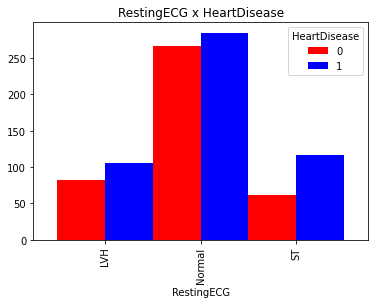

In [110]:
tabela5.plot(kind='bar',width=1.0, color=['red','blue'], title='RestingECG x HeartDisease' ,grid=False)
plt.show()

#individuos eletrocardiograma em repouso normal tiveram mais casos de insuficiencia cardiaca

In [111]:
tabela6 = pd.crosstab(data.ExerciseAngina, data.HeartDisease)
tabela6

HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


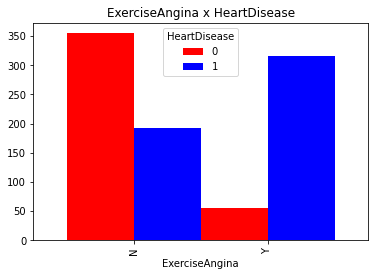

In [112]:
tabela6.plot(kind='bar',width=1.0, color=['red','blue'], title='ExerciseAngina x HeartDisease' ,grid=False)
plt.show()

#individuos com dor no peito induzida por exercicio tiveram mais casos de insuficiencia cardiaca

In [113]:
tabela7 = pd.crosstab(data.ST_Slope, data.HeartDisease)
tabela7

HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


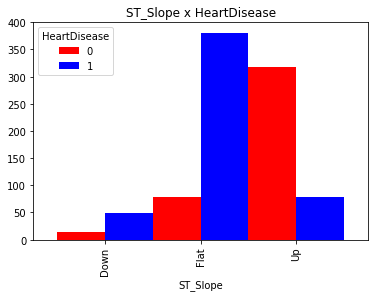

In [114]:
tabela7.plot(kind='bar',width=1.0, color=['red','blue'], title='ST_Slope x HeartDisease' ,grid=False)
plt.show()

#individuos com inclinação do pico do segmento ST do exercicio flat apresentam mais insuficiencia cardiaca

### 7.1.2 Três Atributos

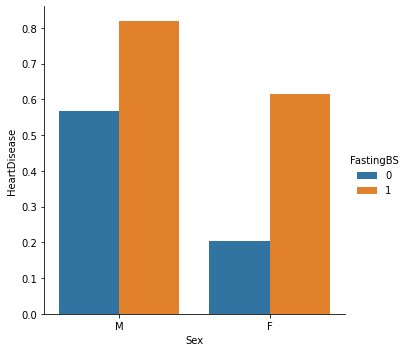

In [115]:
sns.catplot(x='Sex',y='HeartDisease',hue='FastingBS',kind="bar",ci=None,data=data)
plt.show()

#homens e mulheres com açúcar no sangue te

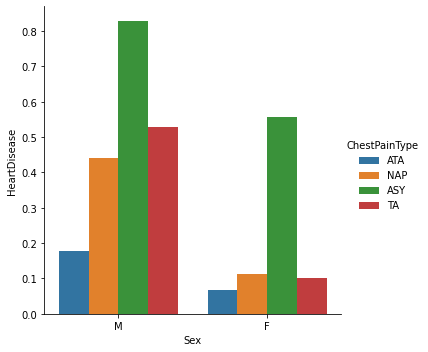

In [116]:
sns.catplot(x='Sex',y='HeartDisease',hue='ChestPainType',kind="bar",ci=None,data=data)
plt.show()

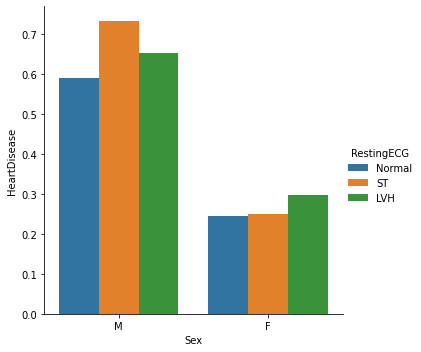

In [117]:
sns.catplot(x='Sex',y='HeartDisease',hue='RestingECG',kind="bar",ci=None,data=data)
plt.show()

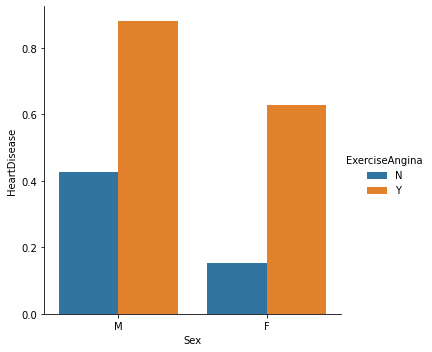

In [118]:
sns.catplot(x='Sex',y='HeartDisease',hue='ExerciseAngina',kind="bar",ci=None,data=data)
plt.show()

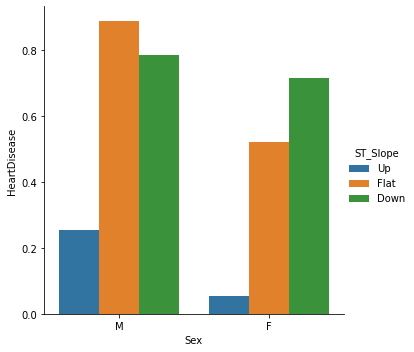

In [119]:
sns.catplot(x='Sex',y='HeartDisease',hue='ST_Slope',kind="bar",ci=None,data=data)
plt.show()

## 7.2 Relações Entre os Atributos Numéricos e Com o Atributo Alvo

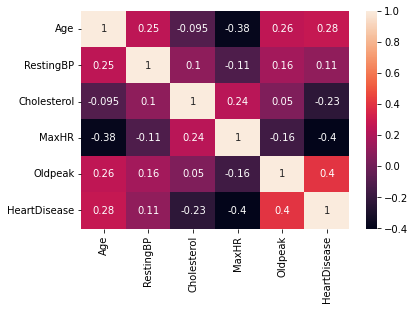

In [120]:
#retirei antes o atributo FastingBS pois apesar de ele ser numerico sua natureza e categorica
#a correlação de pearson que a default neste caso funciona, mas esse atributo ja foi analisado antes e a ideia aqui e usar as numericas
data_no_fastingbs = data.drop('FastingBS', axis=1)

data_no_fastingbs.corr()
sns.heatmap(data_no_fastingbs.corr(),annot=True)
plt.show()

In [121]:
data_no_fastingbs.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


Quando falamos em análise de dados, muitas vezes precisamos entender qual é a associação entre duas ou mais variáveis. Nesse caso, a análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal. Essa medida de grau de relação é medida através de coeficientes. Aqui foi utilizado o coeficiente de Pearson.

O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.


A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

* Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
* Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
* Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

Como podemos interpretar os valores que ρ pode assumir?

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

A função pairplot(), plota a distribuição de cada *feature*, assim como as relações entre pares de features (na forma de scatter plots).

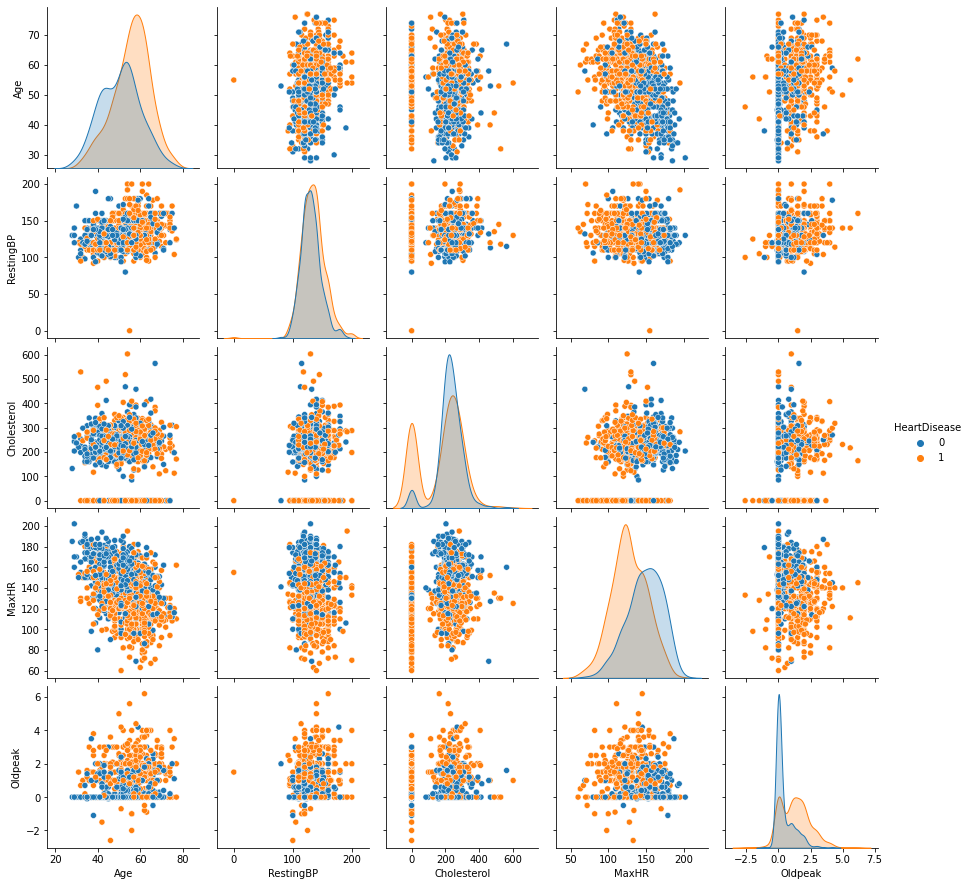

In [122]:
sns.pairplot(data_no_fastingbs, hue = 'HeartDisease')
plt.show()

## 7.3 Relações Entre Atributo Numérico e 2 Categóricos

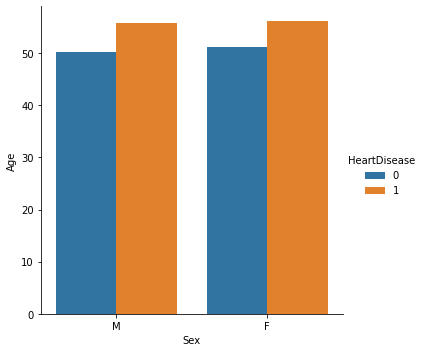

In [123]:
sns.catplot(x='Sex',y='Age',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

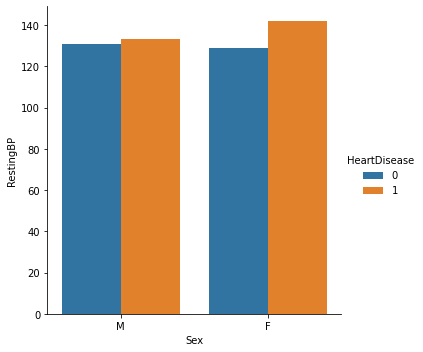

In [124]:
sns.catplot(x='Sex',y='RestingBP',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

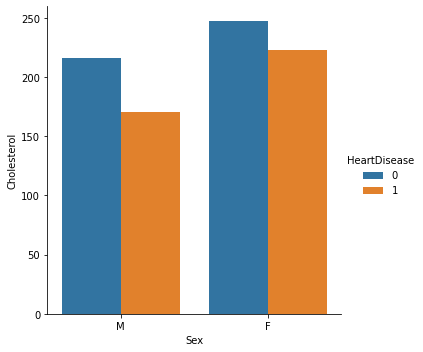

In [125]:
sns.catplot(x='Sex',y='Cholesterol',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

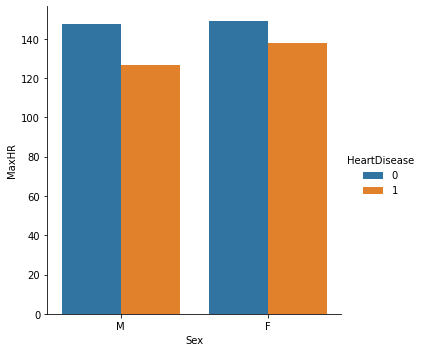

In [126]:
sns.catplot(x='Sex',y='MaxHR',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

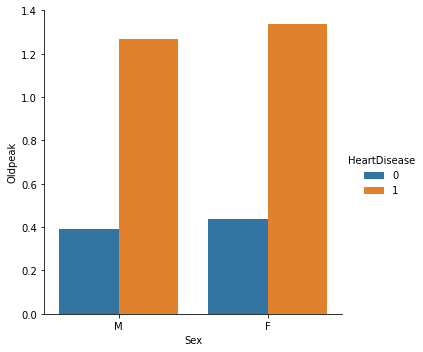

In [127]:
sns.catplot(x='Sex',y='Oldpeak',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

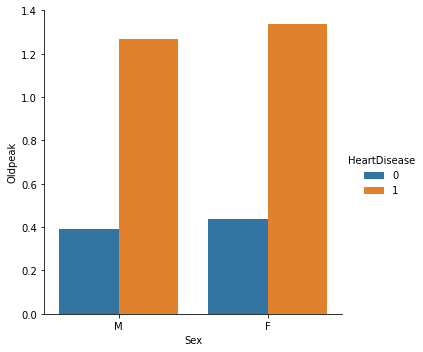

In [128]:
sns.catplot(x='Sex',y='Oldpeak',hue='HeartDisease',kind="bar",ci=None,data=data)
plt.show()

# 8.Referências

[1] BROWNLEE, J. ***Data peparation for mahine Learning: data cleaning, feature
selection, and data transforms in python***. V1.1. Machine Learning
Mastery, 2020.

[2] FACELI, K. et al. ***Inteligência artificial: uma abordagem de aprendizado de
maquina.*** 1 ed. Rio de Janeiro: Grupo Gen - LTC, 2011.

[3] https://seaborn.pydata.org/

[4] https://matplotlib.org/

[5] https://www.kaggle.com/